<a href="https://colab.research.google.com/github/shinjinisen/cryptocurrency-model-predictor/blob/main/Model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1inch Prediction**


Importing libraries

In [1]:
import numpy as n
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

Data preprocessing

In [3]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/1inch.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-3-b3e586d601da>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/1inch.csv', date_parser=True)
<ipython-input-3-b3e586d601da>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-3-b3e586d601da>:8: FutureWarning: A value is trying to be set on a copy

In [25]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
training_data = data[data['Open'] <=3.54338].copy()
test_data = data[data['Open'] > 3.54338].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')


Feature Scaling

In [26]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)


Building the model

In [38]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Fitting of model

In [39]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 387ms/step - loss: 0.2272 - val_loss: 0.0157
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0418 - val_loss: 0.0318
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 0.0241 - val_loss: 0.0119
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - loss: 0.0154 - val_loss: 0.0043
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - loss: 0.0152 - val_loss: 0.0020
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.0132 - val_loss: 0.0012
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - loss: 0.0108 - val_loss: 0.0011
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 0.0125 - val_loss: 8.9245e-04
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - loss: 0.0114 - val_loss: 8.1320e-04
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - loss: 0.0136 - val_loss: 7.3599e-04
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 0.0101 - val_loss: 6.6801e-04
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━

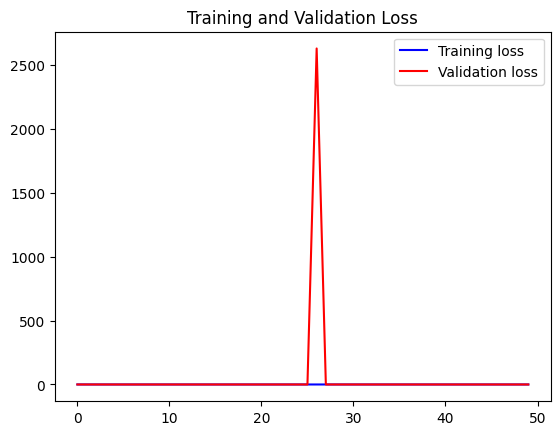

In [44]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()



In [45]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

Predicting and plotting the output

In [46]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step


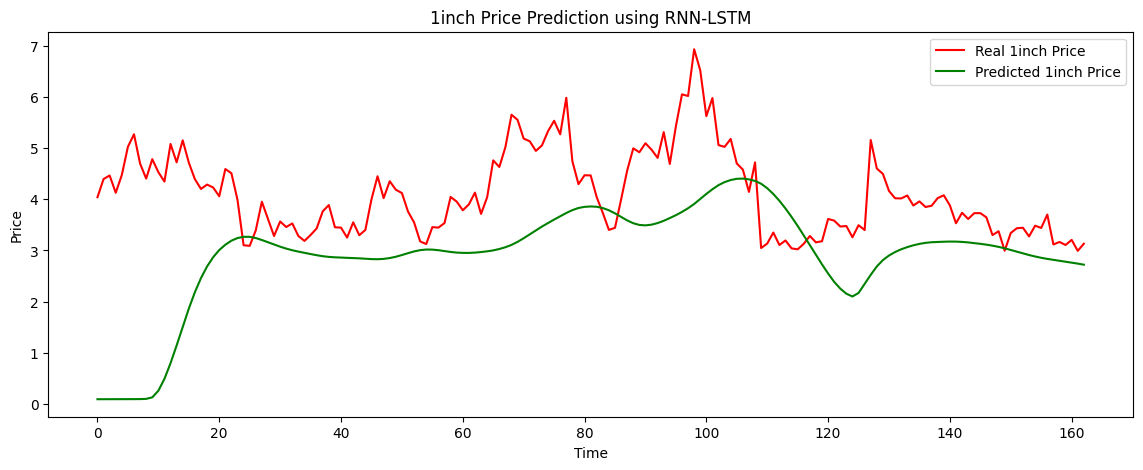

In [65]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real 1inch Price')
plt.plot(Y_pred, color='green', label='Predicted 1inch Price')
plt.title('1inch Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


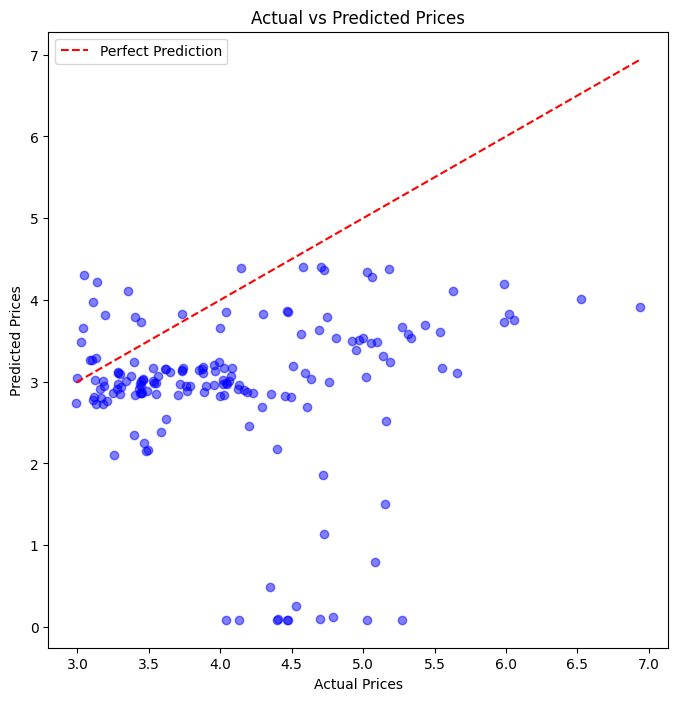

In [50]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


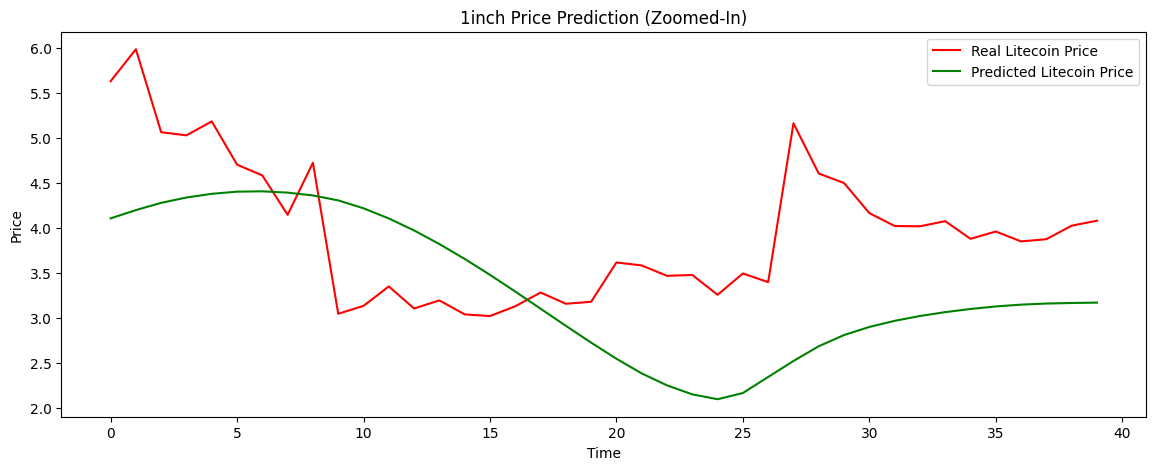

In [54]:
start, end = 100, 140  # Adjust these indices for the desired time period
plt.figure(figsize=(14, 5))
plt.plot(Y_test[start:end], color='red', label='Real Litecoin Price')
plt.plot(Y_pred[start:end], color='green', label='Predicted Litecoin Price')
plt.title('1inch Price Prediction (Zoomed-In)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Bitcoin** **Prediction**

In [56]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/bitcoin.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-56-070e78c2bf60>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/bitcoin.csv', date_parser=True)
<ipython-input-56-070e78c2bf60>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-56-070e78c2bf60>:8: FutureWarning: A value is trying to be set on a

In [58]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
training_data = data[data['Open'] <=3.54338].copy()
test_data = data[data['Open'] > 3.54338].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')


In [59]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)


In [60]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 471ms/step - loss: 0.1159 - val_loss: 0.0577
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 0.0370 - val_loss: 0.1041
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 0.0219 - val_loss: 0.0210
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 0.0209 - val_loss: 0.0134
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - loss: 0.0152 - val_loss: 0.0388
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.0157 - val_loss: 0.0186
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 0.0095 - val_loss: 0.0305
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 0.0120 - val_loss: 0.0223
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - loss: 0.0130 - val_loss: 0.0087
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - loss: 0.0145 - val_loss: 0.0346
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 234ms/step - loss: 0.0129 - val_loss: 0.0186
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0096 - val_l

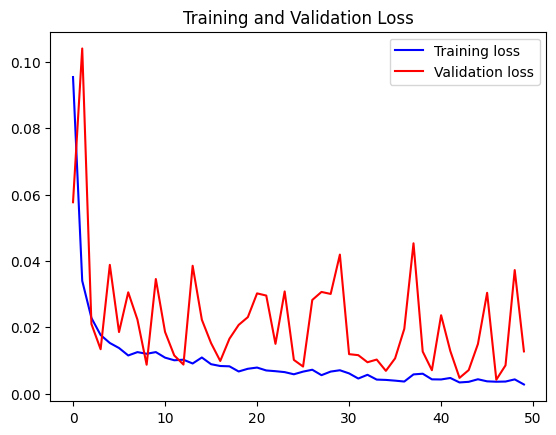

In [62]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


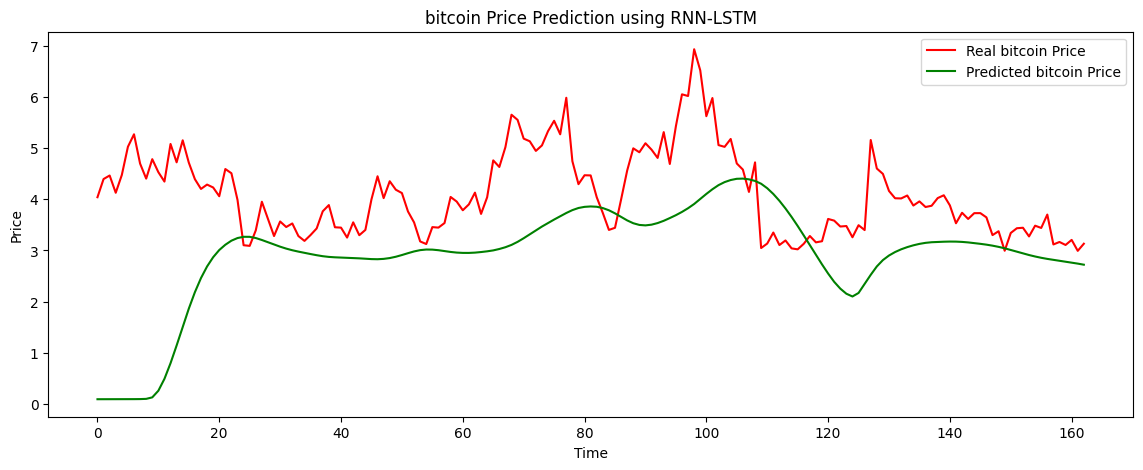

In [66]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real bitcoin Price')
plt.plot(Y_pred, color='green', label='Predicted bitcoin Price')
plt.title('bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Binance USD Prediction**

In [30]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/Binance USD.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-30-ecc12c0a51b1>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/Binance USD.csv', date_parser=True)
<ipython-input-30-ecc12c0a51b1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-30-ecc12c0a51b1>:8: FutureWarning: A value is trying to be set 

In [33]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <= '2021-04-05'].copy()
test_data = data[data['Date'] > '2021-04-05'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')


<ipython-input-33-92b7b871845b>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [34]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [35]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - loss: 0.0819 - val_loss: 0.0127
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 0.0092 - val_loss: 4.6734e-04
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - loss: 0.0051 - val_loss: 1.4723e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - loss: 0.0060 - val_loss: 2.1284e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - loss: 0.0043 - val_loss: 2.0498e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0041 - val_loss: 1.6915e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - loss: 0.0038 - val_loss: 4.8400e-04
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - loss: 0.0039 - val_loss: 4.9519e-04
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.0048 - val_loss: 3.3943e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 350ms/step - loss: 0.0045 - val_loss: 1.2171e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - loss: 0.0029 - val_loss: 2.0907e-04
Epoch 12/50

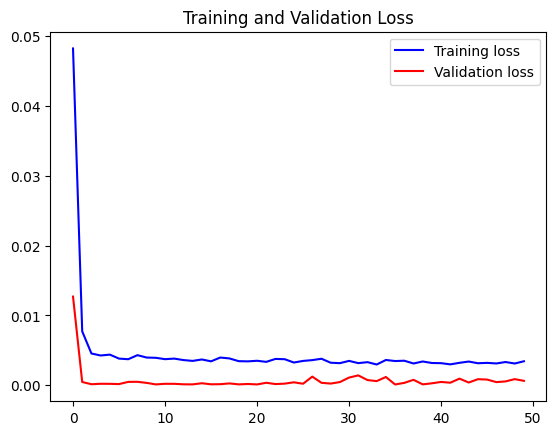

In [37]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [38]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [39]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


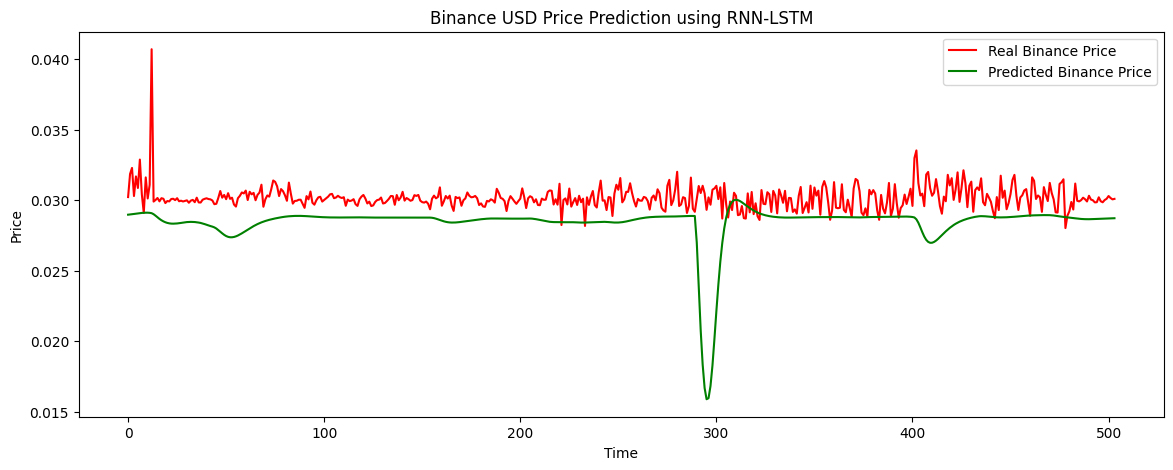

In [40]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Binance Price')
plt.plot(Y_pred, color='green', label='Predicted Binance Price')
plt.title('Binance USD Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Dogecoin** **Prediction**

In [41]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/dogecoin.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-41-87a364a9db52>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/dogecoin.csv', date_parser=True)
<ipython-input-41-87a364a9db52>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-41-87a364a9db52>:8: FutureWarning: A value is trying to be set on 

In [51]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2019-05-12'].copy()
test_data = data[data['Date'] > '2019-05-12'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')


<ipython-input-51-db79386c03c1>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [52]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [54]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Fitting of Model

In [55]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 0.0197 - val_loss: 0.0011
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 341ms/step - loss: 0.0071 - val_loss: 0.0013
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - loss: 0.0068 - val_loss: 6.5627e-04
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - loss: 0.0043 - val_loss: 5.9606e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 506ms/step - loss: 0.0032 - val_loss: 9.9870e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - loss: 0.0036 - val_loss: 4.8082e-04
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - loss: 0.0043 - val_loss: 9.5770e-04
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 351ms/step - loss: 0.0027 - val_loss: 9.7239e-04
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - loss: 0.0047 - val_loss: 5.3396e-04
Epoch 12/50
19/19 ━━━━

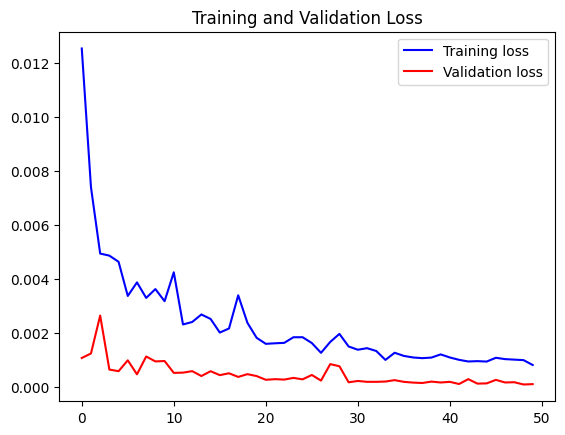

In [56]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [57]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [58]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step


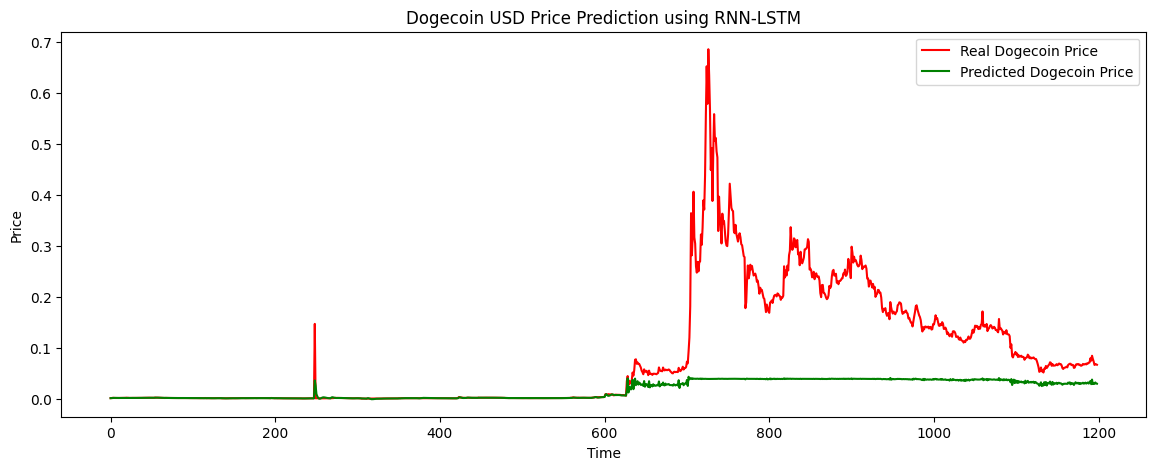

In [59]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Dogecoin Price')
plt.plot(Y_pred, color='green', label='Predicted Dogecoin Price')
plt.title('Dogecoin USD Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Ethereum** **Price** **Prediction**

In [123]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/ethereum.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
# Interpolating instead of mean filling
data['Open'].interpolate(method='linear', inplace=True)
data['High'].interpolate(method='linear', inplace=True)
data['Low'].interpolate(method='linear', inplace=True)
data['Close'].interpolate(method='linear', inplace=True)
data['Volume'].interpolate(method='linear', inplace=True)

# data['Open'].fillna(value=data['Open'].mean(), inplace=True)
# data['High'].fillna(value=data['High'].mean(), inplace=True)
# data['Low'].fillna(value=data['Low'].mean(), inplace=True)
# data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
#data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-123-213335676fe5>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/ethereum.csv', date_parser=True)
<ipython-input-123-213335676fe5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].interpolate(method='linear', inplace=True)
<ipython-input-123-213335676fe5>:9: FutureWarning: A value is trying to be set on a 

In [124]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <= '2020-02-26'].copy()
test_data = data[data['Date'] > '2020-02-26'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-124-773ab029c7b9>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [125]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [126]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_60 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_61 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_62 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_63 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 289ms/step - loss: 0.0151 - val_loss: 4.0094e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - loss: 0.0024 - val_loss: 5.8674e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - loss: 0.0036 - val_loss: 2.5564e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - loss: 0.0020 - val_loss: 1.8327e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.0021 - val_loss: 4.1710e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - loss: 0.0022 - val_loss: 7.8119e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - loss: 0.0026 - val_loss: 1.7060e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 287ms/step - loss: 0.0021 - val_loss: 9.1994e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - loss: 0.0018 - val_loss: 1.8554e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - loss: 0.0018 - val_loss: 1.0487e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - loss: 0.0017 - val_loss: 2.9080e-

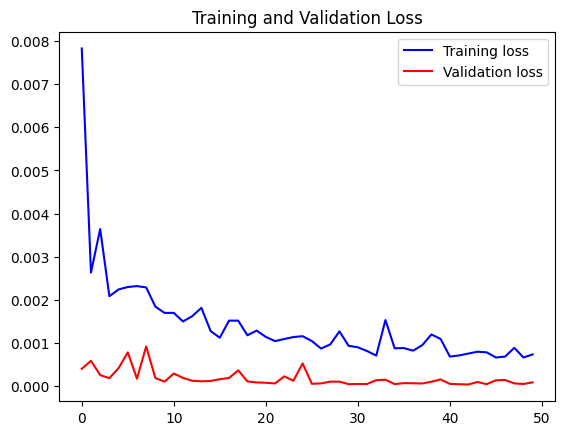

In [128]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [129]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [130]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


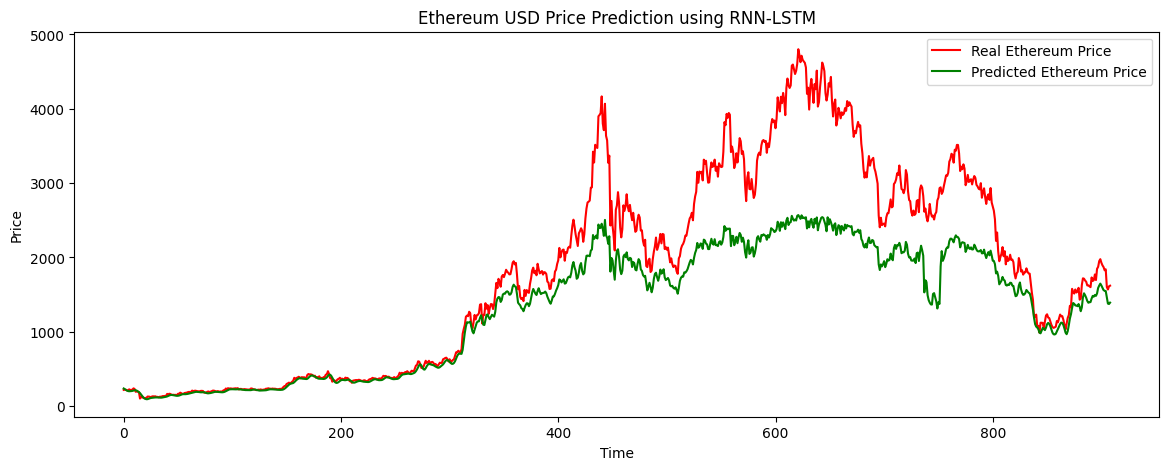

In [131]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Ethereum Price')
plt.plot(Y_pred, color='green', label='Predicted Ethereum Price')
plt.title('Ethereum USD Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Polkadot** **Price** **Prediction**

In [5]:
import numpy as n
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

Data Preprocessing

In [6]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/polkadot.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-6-b4337935495b>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/polkadot.csv', date_parser=True)
<ipython-input-6-b4337935495b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-6-b4337935495b>:8: FutureWarning: A value is trying to be set on a c

In [60]:
# Splitting data into training and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2021-09-08'].copy()
test_data = data[data['Date'] >'2021-09-08'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-60-05b96f480056>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


Feature Scaling

In [61]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [62]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:

# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 293ms/step - loss: 2.2771e-04 - val_loss: 0.0364
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 1.5652e-04 - val_loss: 0.0254
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - loss: 5.3206e-05 - val_loss: 0.0166
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 9.5271e-05 - val_loss: 0.0314
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 5.6417e-05 - val_loss: 0.0274
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - loss: 5.9635e-05 - val_loss: 0.0178
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 1.0573e-04 - val_loss: 0.0178
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - loss: 7.0439e-05 - val_loss: 0.0448
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 6.1063e-05 - val_loss: 0.0203
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - loss: 1.7274e-04 - val_loss: 0.0259
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - loss: 6.2895e-05 - val_loss: 0.02

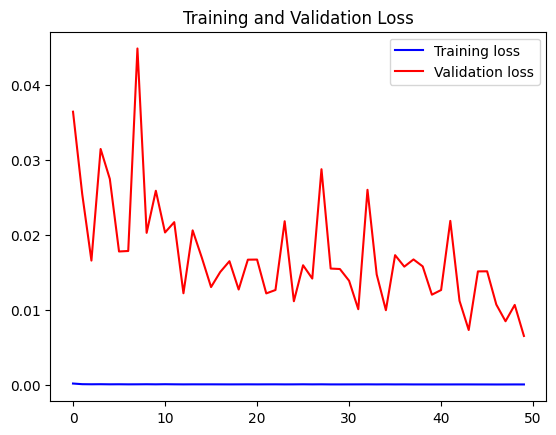

In [64]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [65]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [66]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step


Predicting and plotting the output

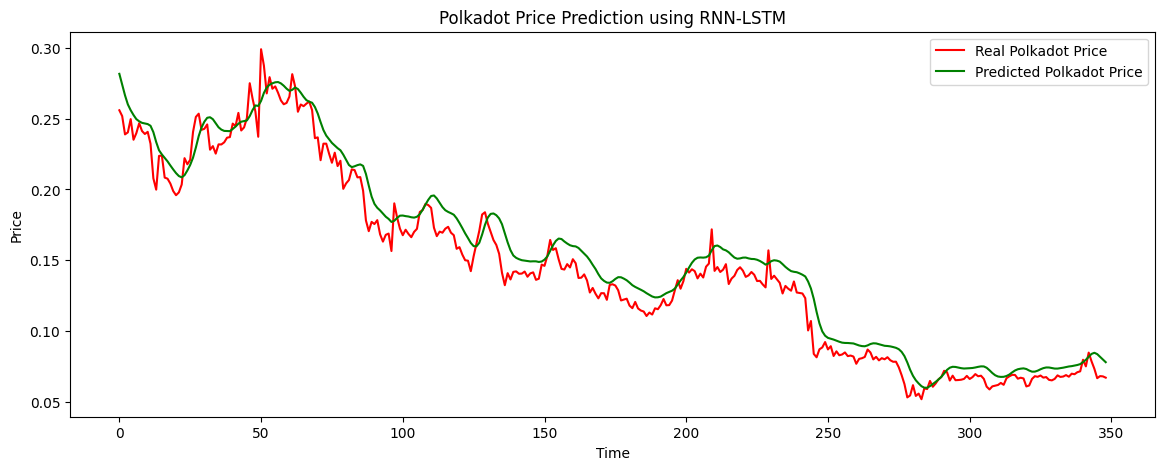

In [67]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Polkadot Price')
plt.plot(Y_pred, color='green', label='Predicted Polkadot Price')
plt.title('Polkadot Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Shiba** **Inu** **Price** **Prediction**

In [53]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/Shiba Inu.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-53-8c3cd336a04c>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/Shiba Inu.csv', date_parser=True)
<ipython-input-53-8c3cd336a04c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-53-8c3cd336a04c>:8: FutureWarning: A value is trying to be set on

In [68]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2021-01-15'].copy()
test_data = data[data['Date'] > '2021-01-15'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-68-18ec5732872d>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [69]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [70]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_35 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 267ms/step - loss: 0.0018 - val_loss: 1.1435e-04
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - loss: 0.0021 - val_loss: 9.8741e-05
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - loss: 4.7896e-04 - val_loss: 1.1651e-04
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - loss: 0.0013 - val_loss: 8.1932e-05
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - loss: 1.0694e-04 - val_loss: 6.8849e-05
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - loss: 0.0027 - val_loss: 6.2086e-05
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 287ms/step - loss: 0.0017 - val_loss: 9.6775e-05
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - loss: 4.2932e-04 - val_loss: 9.1456e-05
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 233ms/step - loss: 1.1760e-04 - val_loss: 1.1340e-04
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - loss: 0.0020 - val_loss: 5.1051e-05
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - loss: 8.8346e-04 -

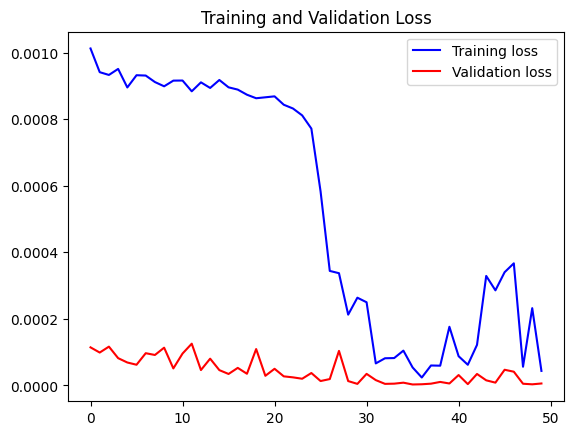

In [72]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [73]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [74]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step


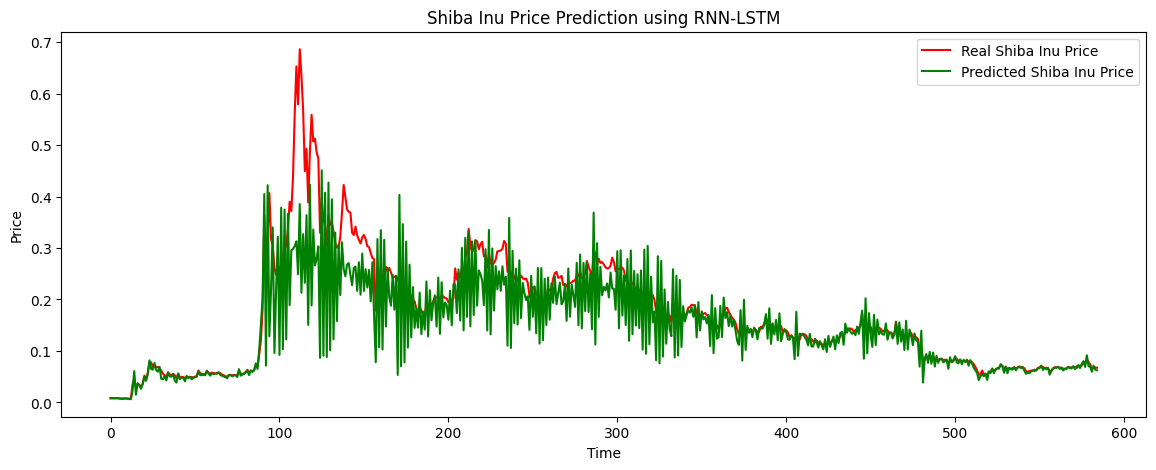

In [75]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Shiba Inu Price')
plt.plot(Y_pred, color='green', label='Predicted Shiba Inu Price')
plt.title('Shiba Inu Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Solana** **Price** **Prediction**

In [97]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/solana.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-97-3631c316d3b6>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/solana.csv', date_parser=True)
<ipython-input-97-3631c316d3b6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-97-3631c316d3b6>:8: FutureWarning: A value is trying to be set on a 

In [106]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2021-05-09'].copy()
test_data = data[data['Date'] > '2021-05-09'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-106-d08383500306>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [107]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [108]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_54 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_54 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_55 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_55 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - loss: 0.0175 - val_loss: 0.0179
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0037 - val_loss: 0.1121
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - loss: 0.0036 - val_loss: 0.0144
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - loss: 0.0021 - val_loss: 0.0187
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - loss: 0.0015 - val_loss: 0.0098
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 0.0021 - val_loss: 0.0132
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - loss: 0.0017 - val_loss: 0.0155
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 0.0011 - val_loss: 0.0080
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - loss: 0.0017 - val_loss: 0.0091
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - loss: 0.0013 - val_loss: 0.0133
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - loss: 0.0011 - val_loss: 0.0094
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 0.0015 - val_lo

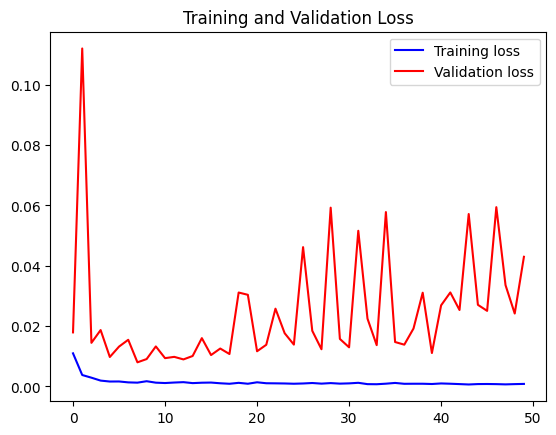

In [110]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [111]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [112]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step


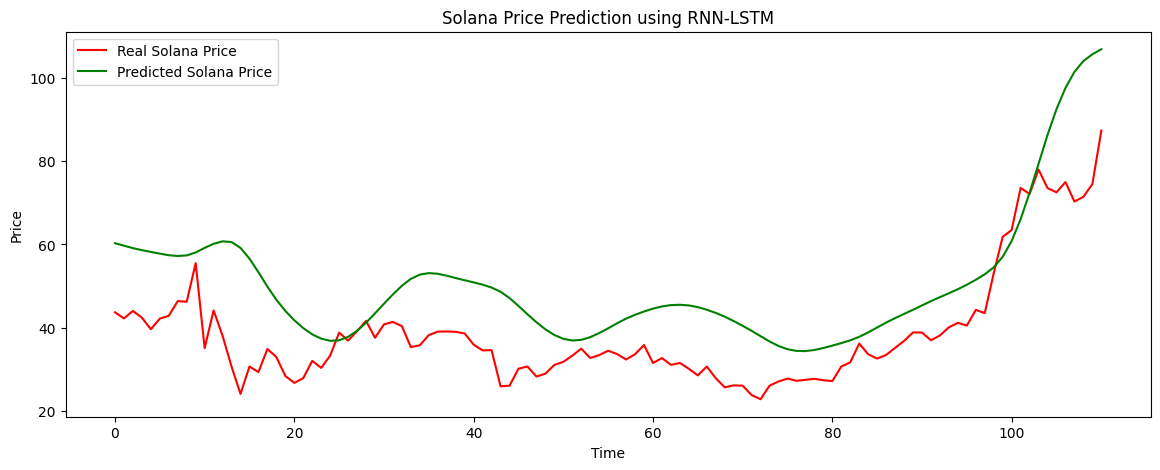

In [113]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Solana Price')
plt.plot(Y_pred, color='green', label='Predicted Solana Price')
plt.title('Solana Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **Tether Price Prediction**

In [88]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/tether.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-88-343544d42e60>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/tether.csv', date_parser=True)
<ipython-input-88-343544d42e60>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-88-343544d42e60>:8: FutureWarning: A value is trying to be set on a 

In [89]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2020-03-09'].copy()
test_data = data[data['Date'] > '2020-03-09'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-89-3a3eedfbfb66>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [90]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [91]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - loss: 0.0671 - val_loss: 0.0049
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - loss: 0.0071 - val_loss: 7.3846e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - loss: 0.0050 - val_loss: 4.0571e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - loss: 0.0046 - val_loss: 7.9218e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - loss: 0.0045 - val_loss: 4.8639e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - loss: 0.0049 - val_loss: 4.5952e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - loss: 0.0049 - val_loss: 5.6581e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - loss: 0.0041 - val_loss: 4.0587e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - loss: 0.0048 - val_loss: 4.6510e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - loss: 0.0046 - val_loss: 7.2845e-04
Epoch 12/50


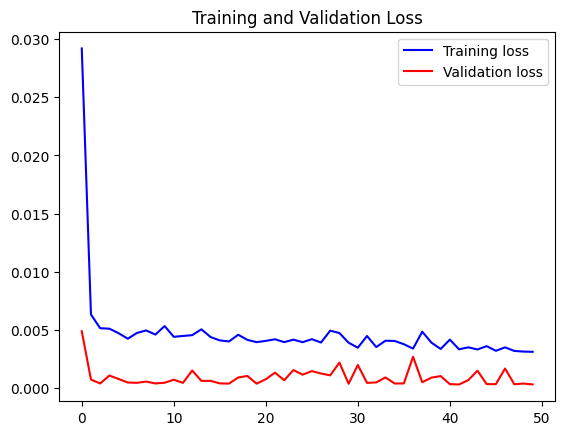

In [93]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [94]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [95]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


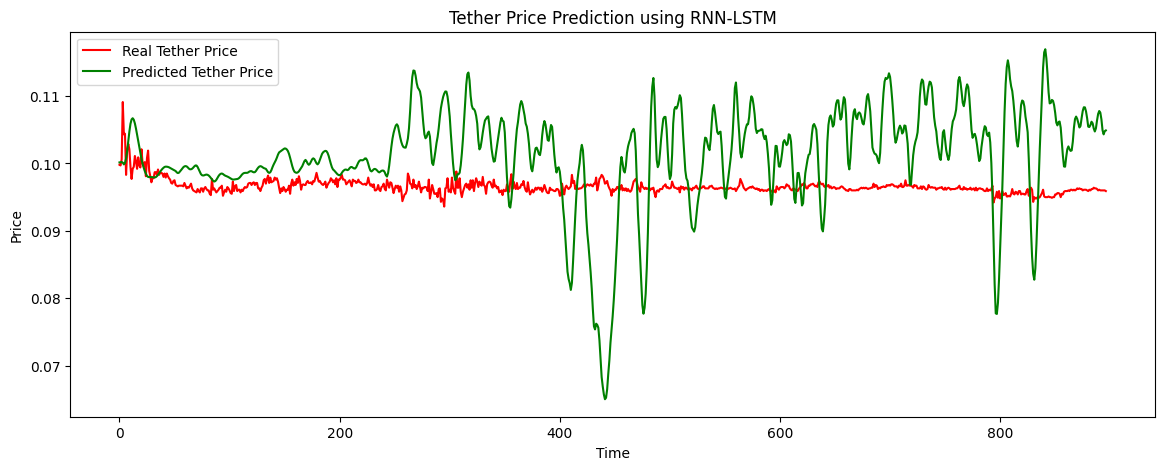

In [96]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real Tether Price')
plt.plot(Y_pred, color='green', label='Predicted Tether Price')
plt.title('Tether Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **USD coin prediction**

In [114]:
# Importing data and rectifying loss of data by filling the NaN values with mean of the whole field
data = p.read_csv('/content/sample_data/usd coin.csv', date_parser=True)
count = 0
for j in data['Open']:
  if(math.isnan(j)):
    count+=1
data['Open'].fillna(value=data['Open'].mean(), inplace=True)
data['High'].fillna(value=data['High'].mean(), inplace=True)
data['Low'].fillna(value=data['Low'].mean(), inplace=True)
data['Close'].fillna(value=data['Close'].mean(), inplace=True)
# data['Currency'].fillna(value=data['Currency'].mean(), inplace=True)
data['Volume'].fillna(value=data['Volume'].mean(), inplace=True)
print(f"Number of empty tuples in imported dataset: {count}")

Number of empty tuples in imported dataset: 0


<ipython-input-114-7a90a93d357e>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = p.read_csv('/content/sample_data/usd coin.csv', date_parser=True)
<ipython-input-114-7a90a93d357e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Open'].fillna(value=data['Open'].mean(), inplace=True)
<ipython-input-114-7a90a93d357e>:8: FutureWarning: A value is trying to be set 

In [115]:
# Splitting data into traing and test data and dropping all the unnecessary columns from the table
# data['Date'] = p.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)
training_data = data[data['Date'] <='2021-06-28'].copy()
test_data = data[data['Date'] > '2021-06-28'].copy()
training_data = training_data.drop(['Date', 'Currency'], axis=1, errors='ignore')

<ipython-input-115-a3502a94e6b4>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = p.to_datetime(data['Date'], infer_datetime_format=True)


In [116]:
# Scaling the data to fit a particular range
if training_data.empty:
  print("Warning: training_data is empty. Check your date filtering condition or data.")
else:
  scaler = MinMaxScaler()
  train_data = scaler.fit_transform(training_data)
  X_train = []
  Y_train = []
  for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i - 60:i])
    Y_train.append(train_data[i, 0])

  X_train = n.array(X_train)
  Y_train = n.array(Y_train)

In [117]:
# Creating multiple layers of neural network
model = Sequential()
model.add(LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_56 (LSTM)                       │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_57 (LSTM)                       │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_58 (LSTM)                       │ (None, 60, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_59 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281,473 (1.07 MB)

 Trainable params: 281,473 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Training the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - loss: 0.1339 - val_loss: 0.0055
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.0065 - val_loss: 1.3393e-04
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - loss: 0.0047 - val_loss: 1.0065e-04
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - loss: 0.0043 - val_loss: 1.2061e-05
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - loss: 0.0033 - val_loss: 9.6985e-05
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - loss: 0.0034 - val_loss: 7.4141e-04
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - loss: 0.0032 - val_loss: 6.7642e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - loss: 0.0039 - val_loss: 1.9084e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.0028 - val_loss: 1.6990e-04
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - loss: 0.0029 - val_loss: 5.2239e-05
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 0.0028 - val_loss: 9.7932e-06
Epoch

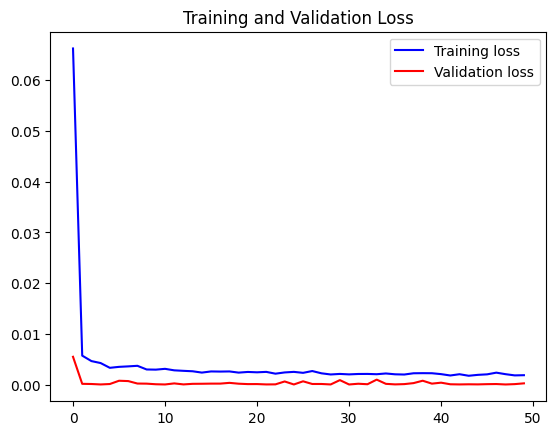

In [119]:
# Calculating the loss and validation loss and plotting a graph to compare them

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [120]:
# Creating a test data to predict the trend of the market before 60 days
part_60_days = training_data.tail(60)
df = p.concat([part_60_days, test_data], ignore_index=True)
df = df.drop(['Date', 'Currency'], axis=1)
df.head()
inputs = scaler.transform(df)

X_test = []
Y_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [121]:
# Scaling the data for plotting the final graph
Y_pred = model.predict(X_test)

scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step


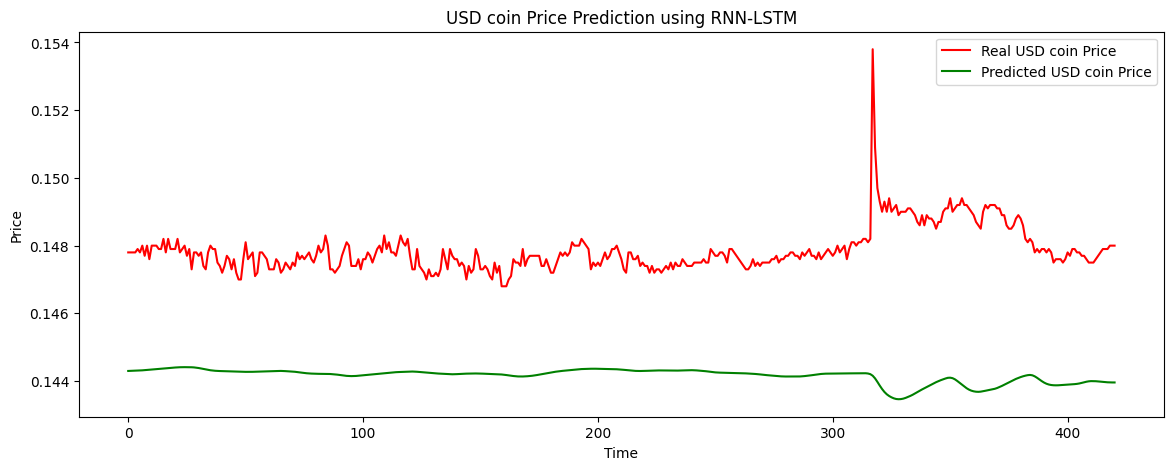

In [122]:
# Plotting the final graph to predict the trend of the market
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='red', label='Real USD coin Price')
plt.plot(Y_pred, color='green', label='Predicted USD coin Price')
plt.title('USD coin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()